In [40]:
# Handle the plotting
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
style.use("seaborn-deep")

# For data processing
import pandas as pd
import datetime as dt

# For getting the data
import pandas_datareader.data as web

In [34]:
company_stock = "TSLA"
file_location = "stock_prices/{0}_csv.csv".format(company_stock)
try:
    df = pd.read_csv(file_location, parse_dates=True, index_col=0)
    print("Loaded data for {0} from local file".format(company_stock))
except:
    start = dt.datetime(2015, 1, 1)
    end = dt.datetime(2017, 7, 15)
    print("Pulling data for {0}".format(company_stock))
    df = web.DataReader(
        company_stock, "yahoo", start=start, end=end
    )
    df.to_csv(file_location)
    print("Successfully pulled data for {0}".format(company_stock))

Loaded data for TSLA from local file


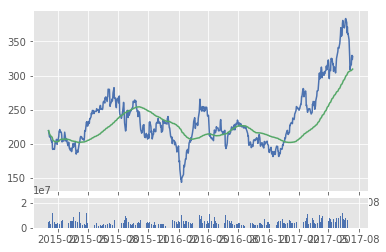

In [38]:
df["100MA"] = df["Adj Close"].rolling(window=100, min_periods=0).mean()
# create a rolling mean of 100 days, keeping the first 100 days

ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(df.index, df["Adj Close"])
ax1.plot(df.index, df["100MA"])
ax2.bar(df.index, df["Volume"])
plt.show()

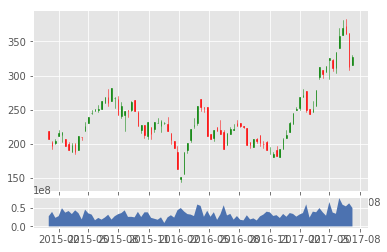

In [43]:
# Resampling data

df_ohlc = df["Adj Close"].resample("10D").ohlc()
df_volume = df["Volume"].resample("10D").sum()

df_ohlc.reset_index(inplace=True)
df_ohlc["Date"] = df_ohlc["Date"].map(mdates.date2num)

ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup="g")
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()

In [ ]:
# Scraper

